<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns

In [3]:
#notice: Disable all warnings 
import warnings
warnings.filterwarnings('ignore')

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


## Let's download the dataset an load it


In [4]:
#!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
    
# alternet method for grabbing the online data
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv', delimiter=",")


# grab directly from the file
#pdf = pd.read_csv("data/loan_train.csv")

# take a look at the dataset
df.head(10)

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


### Get the shape of the data set


In [5]:
df.shape

(346, 10)

### Convert to date time object


In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head(400)

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male
...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [7]:

# set loan status 'PAIDOFF'=1 vs 'COLLECTION'=0
read_list = df['loan_status']
new_column = []
new_column_name = 'loan_status_paid_1_coll_0'
print(f"list = {list} ")
print(f"len(list[fix_i]) = {len(read_list)} ")
for fix_i in range(0, len(read_list)):
    if read_list[fix_i] == 'PAIDOFF':
        new_column.append(1)
    elif read_list[fix_i] == 'COLLECTION':
        new_column.append(0)
    else:
        raise print('ERROR')

df[new_column_name] = new_column
        
df.head(400)


list = <class 'list'> 
len(list[fix_i]) = 346 


,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,loan_status_paid_1_coll_0
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,1
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,1
...,...,...,...,...,...,...,...,...,...,...,...
341,394,394,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,0
342,395,395,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,0
343,397,397,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,0
344,398,398,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,0


In [8]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


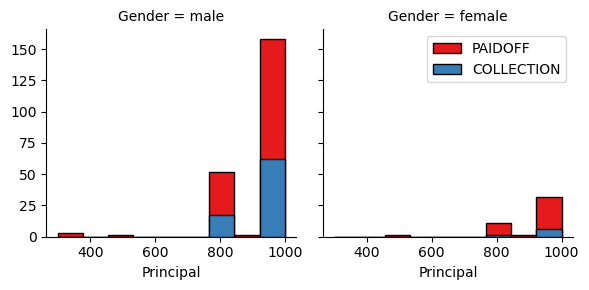

In [9]:
bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

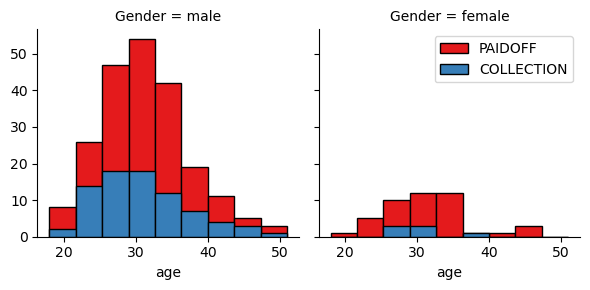

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


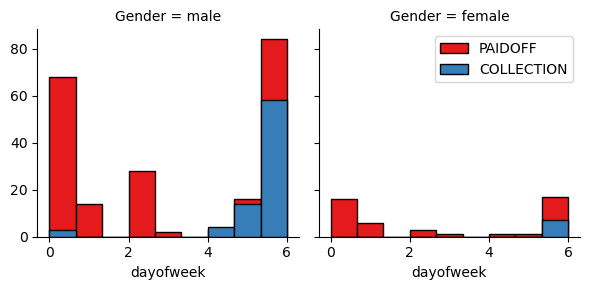

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,loan_status_paid_1_coll_0,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,1,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,1,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,1,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [13]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [14]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0.1,Unnamed: 0,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,loan_status_paid_1_coll_0,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,1,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,1,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,1,4,1


## One Hot Encoding

#### How about education?


In [15]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [16]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [17]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [18]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [19]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [20]:
y_binary = df[new_column_name].values
y_binary[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [21]:
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor (KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


## Import the packages for all

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


## Split into training/testing set and iterate thru many points to determine the best k-value
## Find the k-value which as the max accuracy

In [67]:
# split and extract the training and testing data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5)
#print (f'Training set:\n{X_train.shape} {y_train.shape}\n')
#print (f'Testing set:\n{X_test.shape} {y_test.shape}\n')

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split( X, y_binary, test_size=0.2, random_state=5)
#print (f'Training Binary set:\n{X_train_binary.shape} {y_train_binary.shape}\n')
#print (f'Testing Binary set:\n{X_test_binary.shape} {y_test_binary.shape}\n')

k_values = 100

mean_accuracy_score = np.zeros(k_values)
f1_score_value = np.zeros(k_values)
jaccard_score_value = np.zeros(k_values)

list_number_count_j = 0
for j in range(1, k_values+1):
    #Train Model and Predict  
    neighbor = KNeighborsClassifier(n_neighbors=j, n_jobs=10).fit(X_train, y_train)
    yhat = neighbor.predict(X_test)
    
    mean_accuracy_score[list_number_count_j] = metrics.accuracy_score(y_test, yhat)  
    
    neighbor_binary = KNeighborsClassifier(n_neighbors=j, n_jobs=10).fit(X_train_binary, y_train_binary)
    yhat_binary = neighbor_binary.predict(X_test_binary)
    f1_score_value[list_number_count_j] = f1_score(y_test_binary, yhat_binary)
    jaccard_score_value[list_number_count_j] = jaccard_score(y_test_binary, yhat_binary)
    
    list_number_count_j += 1     

    
#print (f'mean_accuracy_score:\n{mean_accuracy_score}\n')
#print (f'f1_score_value:\n{f1_score_value}\n')
#print (f'jaccard_score_value:\n{jaccard_score_value}\n')

#print (f'len(mean_accuracy_score):\n{len(mean_accuracy_score)}\n')
#print (f'len(f1_score_value):\n{len(f1_score_value)}\n')
#print (f'len(jaccard_score_value):\n{len(jaccard_score_value)}\n')

optimum_list_number = int(f1_score_value.argmax())

optimum_mean_accuracy = mean_accuracy_score[optimum_list_number]
optimum_f1_score_value = f1_score_value[optimum_list_number]
optimum_jaccard_score_value = jaccard_score_value[optimum_list_number]
optimum_k_value = int(optimum_list_number+1)

print("***************")
print("Final values (start)")
print("***************")
print(f"optimum or max f1_score_value's max mean_accuracy_score: {optimum_mean_accuracy}")
print(f"optimum_f1_score_valuee: {optimum_f1_score_value}")
print(f"optimum or max f1_score_value's jaccard_score_value: {optimum_jaccard_score_value}")
print(f"optimum or max f1_score_value's k-value: {optimum_k_value}")
print("***************")
print("Final values (end)")
print("***************")

***************
Final values (start)
***************
optimum or max f1_score_value's max mean_accuracy_score: 0.7428571428571429
optimum_f1_score_valuee: 0.8448275862068965
optimum or max f1_score_value's jaccard_score_value: 0.7313432835820896
optimum or max f1_score_value's k-value: 33
***************
Final values (end)
***************


## Plot the accuracy vs. k-value

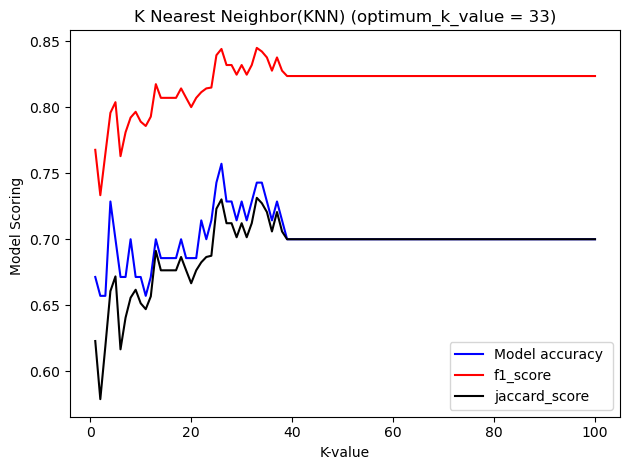

In [42]:
plt.plot(range(1,k_values+1), mean_accuracy_score, 'b')
plt.plot(range(1,k_values+1), f1_score_value, 'r')
plt.plot(range(1,k_values+1), jaccard_score_value, 'k')

#plt.fill_between(range(1, k_j), (mean_accuracy_score - 2 * std_accuracy_score), (mean_accuracy_score + 2 * std_accuracy_score), alpha=0.30, color='b')
plt.legend(('Model accuracy ', 'f1_score', 'jaccard_score'))
plt.title(f'K Nearest Neighbor(KNN) (optimum_k_value = {optimum_k_value})')
plt.ylabel('Model Scoring ')
plt.xlabel('K-value')
plt.tight_layout()
plt.show()

# Decision Tree


## Split into training/testing set and iterate thru many points to determine the best k-value

In [46]:
# split and extract the training and testing data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5)
#print (f'Training set:\n{X_train.shape} {y_train.shape}\n')
#print (f'Testing set:\n{X_test.shape} {y_test.shape}\n')

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split( X, y_binary, test_size=0.2, random_state=5)
#print (f'Training Binary set:\n{X_train_binary.shape} {y_train_binary.shape}\n')
#print (f'Testing Binary set:\n{X_test_binary.shape} {y_test_binary.shape}\n')

number_max_depth_values = 10
number_random_state_values = 100

total_points = int(number_max_depth_values * number_random_state_values)

list_number_count = np.zeros(total_points)
max_depth = np.zeros(total_points)
random_state = np.zeros(total_points)
mean_accuracy_score = np.zeros(total_points)
f1_score_value = np.zeros(total_points)
jaccard_score_value = np.zeros(total_points)


list_number_count_j = 0                   
for md_j in range(1, number_max_depth_values+1):
    for rs_j in range(1, number_random_state_values+1):

        #Train Model and Predict  
        tree_j = DecisionTreeClassifier(criterion="entropy", max_depth=md_j, random_state=rs_j).fit(X_train, y_train)
        yhat = tree_j.predict(X_test)
        mean_accuracy_score[list_number_count_j] = metrics.accuracy_score(y_test, yhat)  
        
        tree_j_binary = DecisionTreeClassifier(criterion="entropy", max_depth=md_j, random_state=rs_j).fit(X_train_binary, y_train_binary)
        yhat_binary = tree_j_binary.predict(X_test_binary)
        f1_score_value[list_number_count_j] = f1_score(y_test_binary, yhat_binary)
        jaccard_score_value[list_number_count_j] = jaccard_score(y_test_binary, yhat_binary)

        list_number_count[list_number_count_j] = int(list_number_count_j)
        random_state[list_number_count_j] = int(rs_j)
        max_depth[list_number_count_j] = int(md_j)

        list_number_count_j += 1     

list_count_final = len(list_number_count)

#print (f'list_number_count_j:\n{list_number_count_j}\n')  
#print (f'max_depth:\n{max_depth}\n')  
#print (f'random_state:\n{random_state}\n') 
#print (f'mean_accuracy_score:\n{mean_accuracy_score}\n')
#print (f'f1_score_value:\n{f1_score_value}\n')
#print (f'jaccard_score_value:\n{jaccard_score_value}\n')

optimum_list_number = int(f1_score_value.argmax())

optimum_mean_accuracy = mean_accuracy_score[optimum_list_number]
optimum_f1_score_value = f1_score_value[optimum_list_number]
optimum_jaccard_score_value = jaccard_score_value[optimum_list_number]
optimum_max_depth = int(max_depth[optimum_list_number])
optimum_random_state = int(random_state[optimum_list_number])
optimum_list_number_count = int(list_number_count[optimum_list_number])


print(f"optimum random state: {optimum_random_state}")
print(f"optimum_list_number_count: {optimum_list_number_count}")
print(f"total evaluations or len(list_number_count): {len(list_number_count)}")

print("***************")
print("Final values (start)")
print("***************")
print(f"optimum or max f1_score_value's optimum_mean_accuracy: {optimum_f1_score_value}")
print(f"optimum or max f1_score_value: {optimum_f1_score_value}")
print(f"optimum or max f1_score_value's jaccard_score_value: {optimum_jaccard_score_value}")
print(f"optimum max_depth: {optimum_max_depth}")
print("***************")
print("Final values (end)")
print("***************")

optimum random state: 1
optimum_list_number_count: 0
total evaluations or len(list_number_count): 1000
***************
Final values (start)
***************
optimum or max f1_score_value's optimum_mean_accuracy: 0.8235294117647058
optimum or max f1_score_value: 0.8235294117647058
optimum or max f1_score_value's jaccard_score_value: 0.7
optimum max_depth: 1
***************
Final values (end)
***************


## Plot the accuracy vs. max depth

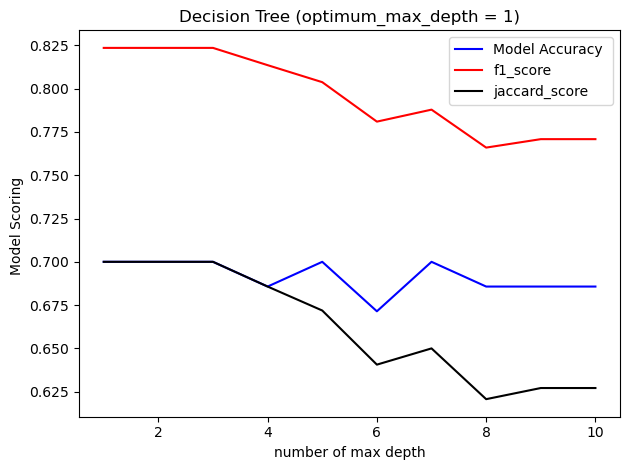

In [58]:
optimum_mean_accuracy_plotting = np.zeros(number_max_depth_values)
optimum_f1_score_value_plotting = np.zeros(number_max_depth_values)
optimum_jaccard_score_value_plotting = np.zeros(number_max_depth_values)
#print(f"optimum max_depth: {optimum_max_depth}")
#print(f"optimum random state: {optimum_random_state}\n")

for opt_mj in range(1, number_max_depth_values+1):
    tree_j = DecisionTreeClassifier(criterion="entropy", max_depth=opt_mj, random_state=optimum_random_state).fit(X_train, y_train)
    yhat = tree_j.predict(X_test)
    optimum_mean_accuracy_plotting[opt_mj-1] = metrics.accuracy_score(y_test, yhat)  
    
    tree_j_binary = DecisionTreeClassifier(criterion="entropy", max_depth=opt_mj, random_state=optimum_random_state).fit(X_train_binary, y_train_binary)
    yhat_binary = tree_j_binary.predict(X_test_binary)
    optimum_f1_score_value_plotting[opt_mj-1] = f1_score(y_test_binary, yhat_binary)
    optimum_jaccard_score_value_plotting[opt_mj-1] = jaccard_score(y_test_binary, yhat_binary)
    
#print(f'optimum_mean_accuracy_plotting = {optimum_mean_accuracy_plotting}')
#print(f'optimum_f1_score_value_plotting = {optimum_f1_score_value_plotting}')
#print(f'optimum_jaccard_score_value_plotting = {optimum_jaccard_score_value_plotting}')
    
plt.plot(range(1, number_max_depth_values+1), optimum_mean_accuracy_plotting, 'b')
plt.plot(range(1, number_max_depth_values+1), optimum_f1_score_value_plotting, 'r')
plt.plot(range(1, number_max_depth_values+1), optimum_jaccard_score_value_plotting, 'k')
plt.legend(('Model Accuracy ', 'f1_score', "jaccard_score"))
plt.title(f'Decision Tree (optimum_max_depth = {optimum_max_depth})')
plt.ylabel('Model Scoring ')
plt.xlabel('number of max depth')
plt.tight_layout()
plt.show()

## Plot the optimum values selection

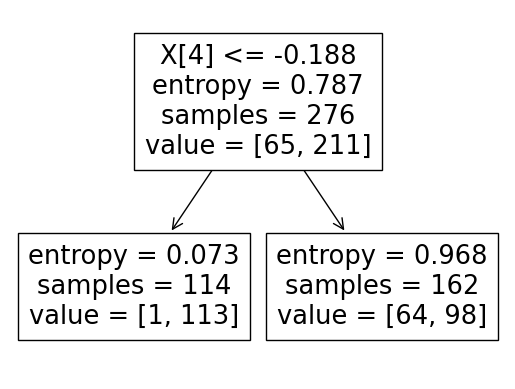

In [59]:
optimum_tree = DecisionTreeClassifier(criterion="entropy", max_depth=optimum_max_depth, random_state=optimum_random_state).fit(X_train, y_train)
optimum_yhat = optimum_tree.predict(X_test)
tree.plot_tree(optimum_tree)
plt.show()

# Support Vector Machine


In [64]:
# split and extract the training and testing data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5)
#print (f'Training set:\n{X_train.shape} {y_train.shape}\n')
#print (f'Testing set:\n{X_test.shape} {y_test.shape}\n')

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split( X, y_binary, test_size=0.2, random_state=5)
#print (f'Training set:\n{X_train.shape} {y_train.shape}\n')
#print (f'Testing set:\n{X_test.shape} {y_test.shape}\n')

clf = svm.SVC(kernel='sigmoid',degree=3, random_state=100)
clf.fit(X_train_binary, y_train_binary) 
yhat_binary = clf.predict(X_test_binary)
#print(f"y_train: {y_train}")
#print(f"yhat: {yhat}")

print("***************")
print("Final values (start)")
print("***************")
print(f"Avg F1-score: {f1_score(y_test_binary, yhat_binary)}")
print(f"jaccard_score: {jaccard_score(y_test_binary, yhat_binary)}")
print("***************")
print("Final values (end)")
print("***************")

***************
Final values (start)
***************
Avg F1-score: 0.7719298245614036
jaccard_score: 0.6285714285714286
***************
Final values (end)
***************


# Logistic Regression 


In [65]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=5)
#print (f'Training set:\n{X_train.shape} {y_train.shape}\n')
#print (f'Testing set:\n{X_test.shape} {y_test.shape}\n')

X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split( X, y_binary, test_size=0.2, random_state=5)
#print (f'Training Binary set:\n{X_train_binary.shape} {y_train_binary.shape}\n')
#print (f'Testing Binary set:\n{X_test_binary.shape} {y_test_binary.shape}\n')

number_random_state_values = 10

total_points = int(number_random_state_values)

list_number_count = np.zeros(total_points)
max_depth = np.zeros(total_points)
random_state = np.zeros(total_points)
log_loss_score = np.zeros(total_points)

f1_score_value = np.zeros(total_points)
jaccard_score_value = np.zeros(total_points)


list_number_count_j = 0                   
for rs_j in range(1, number_random_state_values+1):

    #Train Model and Predict  
    LR = LogisticRegression(C=0.01, solver='liblinear', random_state=rs_j).fit(X_train, y_train)
    yhat = LR.predict_proba(X_test)
    log_loss_score[list_number_count_j] = log_loss(y_test, yhat)
    
    LR_binary = LogisticRegression(C=0.01, solver='liblinear', random_state=rs_j).fit(X_train_binary, y_train_binary)
    yhat_binary = LR_binary.predict(X_test_binary)

    f1_score_value[list_number_count_j] = f1_score(y_test_binary, yhat_binary)
    jaccard_score_value[list_number_count_j] = jaccard_score(y_test_binary, yhat_binary)


    list_number_count[list_number_count_j] = int(list_number_count_j)
    random_state[list_number_count_j] = int(rs_j)
    max_depth[list_number_count_j] = int(md_j)


    list_number_count_j += 1     

list_count_final = len(list_number_count)

#print (f'list_number_count_j:\n{list_number_count_j}\n')  
#print (f'max_depth:\n{max_depth}\n')  
#print (f'random_state:\n{random_state}\n')  
#print (f'f1_score_value:\n{f1_score_value}\n')
#print (f'jaccard_score_value:\n{jaccard_score_value}\n')
#print (f'log_loss_score:\n{log_loss_score}\n')

optimum_list_int = f1_score_value.argmax()

optimum_random_state = int(random_state[optimum_list_int])
optimum_list_number_count = int(list_number_count[optimum_list_int])
optimum_log_loss_score = log_loss_score[optimum_list_int]
#print(f"optimum random state: {optimum_random_state}")
#print(f"optimum_list_number_count: {optimum_list_number_count}")
#print(f"total evaluations or len(list_number_count): {len(list_number_count)}")

print("***************")
print("Final values (start)")
print("***************")
print(f"optimum or f1_score_value: {f1_score_value[optimum_list_int]}")
print(f"optimum or f1_score_value's corresponding Jaccard_score: {jaccard_score_value[optimum_list_int]}")
print(f"optimum or f1_score_value's log_loss_score: {optimum_log_loss_score}")

print("***************")
print("Final values (end)")
print("***************")

***************
Final values (start)
***************
optimum or f1_score_value: 0.8205128205128206
optimum or f1_score_value's corresponding Jaccard_score: 0.6956521739130435
optimum or f1_score_value's log_loss_score: 0.5858479985828119
***************
Final values (end)
***************


optimum max_depth: 1
optimum random state: 1



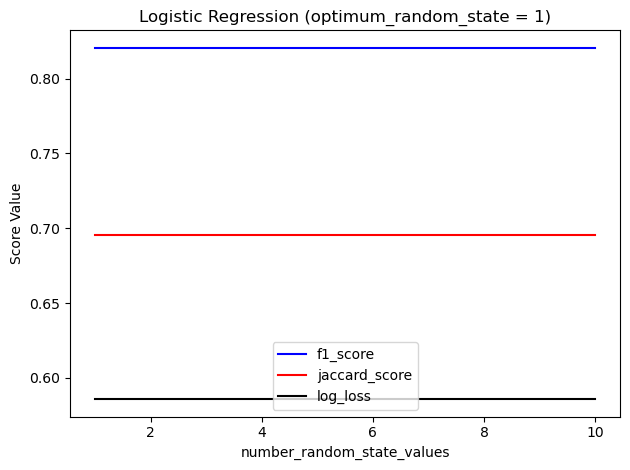

In [66]:
optimum_f1_score_value_plotting = np.zeros(number_max_depth_values)
optimum_jaccard_score_value_plotting = np.zeros(number_max_depth_values)
optimum_log_loss_plotting = np.zeros(number_max_depth_values)
print(f"optimum max_depth: {optimum_max_depth}")
print(f"optimum random state: {optimum_random_state}\n")

for opt_mj in range(1, number_max_depth_values+1):
    LR = LogisticRegression(C=0.01, solver='liblinear', random_state=rs_j).fit(X_train, y_train)
    yhat = LR.predict_proba(X_test)
    optimum_log_loss_plotting[opt_mj-1] = log_loss(y_test, yhat)
    
    LR_binary = LogisticRegression(C=0.01, solver='liblinear', random_state=rs_j).fit(X_train_binary, y_train_binary)
    yhat_binary = LR_binary.predict(X_test_binary)
    optimum_f1_score_value_plotting[opt_mj-1] = f1_score(y_test_binary, yhat_binary)
    optimum_jaccard_score_value_plotting[opt_mj-1] = jaccard_score(y_test_binary, yhat_binary)
    
    
#print(f'optimum_log_loss_plotting = {optimum_log_loss_plotting}')
#print(f'optimum_f1_score_value_plotting = {optimum_f1_score_value_plotting}')
#print(f'optimum_jaccard_score_value_plotting = {optimum_jaccard_score_value_plotting}')
    
plt.plot(range(1, number_max_depth_values+1), optimum_f1_score_value_plotting, 'b')
plt.plot(range(1, number_max_depth_values+1), optimum_jaccard_score_value_plotting, 'r')
plt.plot(range(1, number_max_depth_values+1), optimum_log_loss_plotting, 'k')
plt.legend(('f1_score', "jaccard_score", 'log_loss'))
plt.title(f'Logistic Regression (optimum_random_state = {optimum_random_state})')
plt.ylabel('Score Value')
plt.xlabel('number_random_state_values')
plt.tight_layout()
plt.show()

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | 0.731   | 0.845    | NA      |
| Decision Tree      | 0.700   | 0.824    | NA      |
| SVM                | 0.629   | 0.772    | NA      |
| LogisticRegression | 0.700   | 0.820    | 0.586   |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
